    QA:

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

#Call function and load data
dataset = pd.read_csv('student-mat.csv')
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
dataset.shape

(395, 33)

In [11]:
dataset_dalc= np.average(dataset.iloc[:, -4])
dataset_walc= np.average(dataset.iloc[:,-6])
dataset_absences= np.average(dataset.iloc[:,-7])

print(round(dataset_dalc, 2))
print(round(dataset_walc, 2))
print(round(dataset_absences, 2))

5.71
2.29
1.48


In [12]:
print(dataset['absences'].max())
print(dataset['absences'].min())

75
0


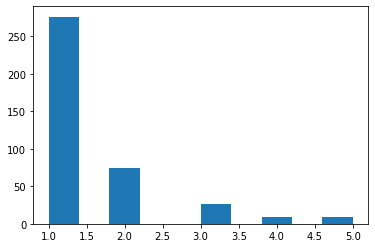

In [18]:
#histogram

#Call function and load data
dataset_absences= dataset.iloc[:,-7]
plt.hist([dataset_absences]) 
#Show plot
plt.show() 

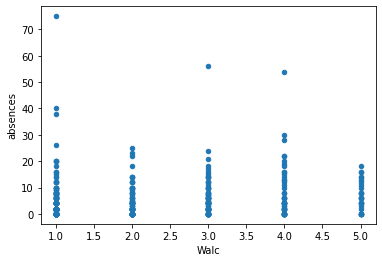

In [77]:
dataset_walc= dataset.iloc[:,-6]
dataset_absences= dataset.iloc[:,-7]

dataset.plot.scatter(x='Walc', y='absences') 
#Show plot
plt.show() 

In [93]:
dataset_walc= dataset.iloc[:,-6]
dataset_absences= dataset.iloc[:,-7]
ds1= dataset['Walc'], ['absences']

corr= ds1.corr()
print(corr)

AttributeError: 'tuple' object has no attribute 'corr'

In [78]:
import seaborn as sns
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [94]:
dataset_walc= dataset.iloc[:,-6]
dataset_absences= dataset.iloc[:,-7]
ds1= pd.DataFrame(index=[dataset_walc, dataset_absences])

ds1.head()

Empty DataFrame
Columns: []
Index: [(1, 1), (1, 1), (3, 2), (1, 1), (2, 1)]

QB

In [6]:
#1 import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [24]:
#2 import dataset
dataset = pd.read_csv('student-mat.csv')
dataset.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
#3 Allocate relevant attributes as input and output
X= dataset.iloc[:, [2, 19, 26, 27]].values
y= dataset.iloc[:, 20].values

In [10]:
#4 Use labelEncode to encode categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1]= labelencoder_X.fit_transform(X[:, 1])
X

array([[18, 1, 1, 1],
       [17, 0, 1, 1],
       [15, 1, 2, 3],
       ...,
       [21, 0, 3, 3],
       [18, 0, 3, 4],
       [19, 1, 3, 3]], dtype=object)

In [12]:
#5 Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 0)

In [14]:
#6 Normalized data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

In [15]:
#7 Fit and predict results using Classifier
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [20]:
y_pred= classifier.predict(X_test)
y_test, y_pred

(array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no'], dtype=object),
 array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes

In [21]:
#Making Confusion Matrix – to check whether the test set gives the correct result
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 0,  7],
       [ 1, 91]], dtype=int64)

In [26]:
xP=sc_X.transform([[18,1,1,3]])
print(xP)
prediction=classifier.predict(xP)
print(prediction)

[[ 1.02374447  0.55653797 -0.56625301  0.49961155]]
['yes']


Q3

In [115]:
#Simple Linear Regression - Step 1:
#import the library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [116]:
#2 import dataset
dataset = pd.read_csv('student-mat.csv')
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [121]:
#3 Allocate relevant attributes as input and output
x= dataset.iloc[:, 30:32].values
y= dataset.iloc[:, -1].values


In [122]:
#splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [123]:
#Simple Linear Regression - Step 2
#Fitting multiple linear regression to training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('Coefficients,beta:', regressor.coef_)
print('Constant,alpha:', regressor.predict([[0,0]]))

Coefficients,beta: [0.09723061 1.01463373]
Constant,alpha: [-1.41970044]


In [124]:
#Simple Linear Regression - Step 3 (checking accuracy)
#Predicting the results for test set
y_pred=regressor.predict(x_test)
print(y_pred)
print(y_test)

[14.14640028 10.81080727  9.60171232 15.35549523 16.27289835 12.01990222
 12.93730533 10.71357666  8.48984799 15.35549523  7.47521426 11.825441
 10.81080727  7.37798365 15.16103401 14.14640028 12.74284412  9.60171232
  8.68430921 15.16103401  6.26611931  4.23685186  6.36334992 15.0638034
 11.92267161 16.27289835  9.60171232 19.60849136 -0.35016374 12.74284412
 -0.93354739  7.47521426  7.57244487  5.25148558 13.13176655  9.89340415
 12.74284412 18.49662702  8.48984799 11.92267161  4.13962125 18.59385763
  7.57244487  8.39261738  9.69894293 -0.93354739 11.825441    4.23685186
 11.92267161  7.18352243  8.78153981 18.39939641 10.81080727  7.66967548
 11.92267161  7.47521426  8.78153981 12.93730533 15.0638034  14.04916967
 13.03453594 13.22899716 14.14640028 15.45272584  8.68430921 15.25826462
 18.59385763 12.21436343  4.23685186  8.68430921  8.48984799 14.04916967
  6.36334992  4.23685186  8.68430921  8.39261738 10.61634605 18.49662702
  6.26611931]
[14 10  9 15 16 12 14 11  9 15 10 11 10 

In [125]:
#calculate the correlation coefficient
corr=np.corrcoef(y_pred, y_test)
print(corr)

[[1.         0.90224246]
 [0.90224246 1.        ]]


In [127]:
y_pred=regressor.predict([[50,60]])
print(y_pred)

[64.31985369]


KeyError: "None of [Float64Index([64.31985369394235], dtype='float64')] are in the [columns]"

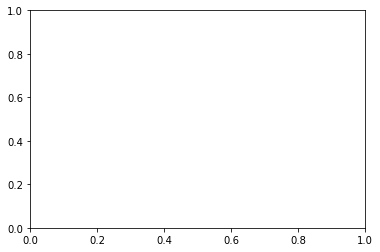

In [135]:
dataset.plot.scatter(y_pred, y_test) 
#Show plot
plt.show() 